# Homework Classic Machine Learning (50 points)

In this Homework, we will try to classify observations of space to be either stars, galaxies or quasars based on the RD14 from the Sloan Digital Sky Survey  (SDSS). The Sloan Digital Sky Survey is a project which offers public data of space observations. Observations have been made since 1998 and have been made accessible to everyone who is interested. 

http://www.sdss.org/
![alt text](http://www.fingerprintdigitalmedia.com/wp-content/uploads/2014/08/sdss1.jpg)

For this purpose a special 2.5 m diameter telescope was built at the Apache Point Observatory in New Mexico, USA. The telescope uses a camera of 30 CCD-Chips with 2048x2048 image points each. The chips are ordered in 5 rows with 6 chips in each row. Each row observes the space through different optical filters (u, g, r, i, z) at wavelengths of approximately 354, 476, 628, 769, 925 nm.


In this homework we will train several classifier to predict the class of a celestial object based on the observations (features). We will practice data prep, dimensionality reduction, model design and training, model comparison, and feature importance selection.

### Importing Libraries

In [106]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
%matplotlib inline


## 1. Data Preparation (20 points)

We follow the following steps:
* read (1 point)
* clean (3 points)
* correlate (4 points)
* explore, spread of values (3 points)
* dimensionality reduction (9 points)


In [107]:
!wget "https://raw.githubusercontent.com/UW-MLGEO/MLGeo-dataset/refs/heads/main/data/Skyserver_SQL2_27_2018 6_51_39 PM.csv"

--2024-11-17 13:26:13--  https://raw.githubusercontent.com/UW-MLGEO/MLGeo-dataset/refs/heads/main/data/Skyserver_SQL2_27_2018%206_51_39%20PM.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 2606:50c0:8001::154, 2606:50c0:8003::154, 2606:50c0:8002::154, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|2606:50c0:8001::154|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1377602 (1.3M) [text/plain]
Saving to: 'Skyserver_SQL2_27_2018 6_51_39 PM.csv.7'

     0K .......... .......... .......... .......... ..........  3% 4.52M 0s
    50K .......... .......... .......... .......... ..........  7% 5.91M 0s
   100K .......... .......... .......... .......... .......... 11% 21.7M 0s
   150K .......... .......... .......... .......... .......... 14% 18.8M 0s
   200K .......... .......... .......... .......... .......... 18% 9.50M 0s
   250K .......... .......... .......... .......... .......... 22% 70.1M 0s
   300K .......... ..


### 1.1 Data read
Read the pandas fata frame from the csv file "Skyserver_SQL2_27_2018 6_51_39 PM.csv" and skip the first row.

**Task: read pandas data frame (1 point)**

Save a copy of the data frame just in case.

In [108]:
# Read the CSV file, skipping the first row
df = pd.read_csv("Skyserver_SQL2_27_2018 6_51_39 PM.csv", skiprows=1)

# Save the DataFrame to a new file
df.to_csv("Skyserver_copy.csv", index=False)
print("skyserver columns", df.columns)
print("skyserver columns", df)
# Confirm the save by printing the first few rows of the new file
#print("Data saved to 'Skyserver_copy.csv'")


skyserver columns Index(['1.23765E+18', '183.5313257', '0.08969303', '19.47406', '17.0424',
       '15.94699', '15.50342', '15.22531', '752', '301', '4', '267',
       '3.72236E+18', 'STAR', '-8.96E-06', '3306', '54922', '491'],
      dtype='object')
skyserver columns        1.23765E+18  183.5313257  0.08969303  19.47406   17.0424  15.94699  \
0     1.237650e+18   183.598370    0.135285  18.66280  17.21449  16.67637   
1     1.237650e+18   183.680207    0.126185  19.38298  18.19169  17.47428   
2     1.237650e+18   183.870529    0.049911  17.76536  16.60272  16.16116   
3     1.237650e+18   183.883288    0.102557  17.55025  16.26342  16.43869   
4     1.237650e+18   183.847174    0.173694  19.43133  18.46779  18.16451   
...            ...          ...         ...       ...       ...       ...   
9994  1.237650e+18   131.316413   51.539547  18.81777  17.47053  16.91508   
9995  1.237650e+18   131.306083   51.671341  18.27255  17.43849  17.07692   
9996  1.237650e+18   131.552562   51.6

**Description of the data fields**

* objid = Object Identifier, self explanatory.
* ra = J2000 Right Ascension (r-band). Angular that is measured eastward along the celestial equator from the Sun at the March equinox to the hour circle of the point above the earth in question.   https://en.wikipedia.org/wiki/Right_ascension
* dec = J2000 Declination (r-band). Angle that is measured north or south of the celestial equator, along the hour circle passing through the point in question. https://en.wikipedia.org/wiki/Declination



The Gunn astronomic magnitude system. u, g, r, i, z represent the response of the 5 bands of the telescope.

Further Information: http://astroweb.case.edu/ssm/ASTR620/mags.html 
* u = better of DeV/Exp magnitude fit
* g = better of DeV/Exp magnitude fit
* r = better of DeV/Exp magnitude fit
* i = better of DeV/Exp magnitude fit
* z = better of DeV/Exp magnitude fit




Run, rerun, camcol and field are features which describe a field within an image taken by the SDSS. A field is basically a part of the entire image corresponding to 2048 by 1489 pixels. 
* run = Run Number, which identifies the specific scan. 
* rereun = Rerun Number, which specifies how the image was processed.
* camcol = Camera column, a number from 1 to 6, identifying the scanline within the run.
* field = Field number, which typically starts at 11 (after an initial rampup time), and can be as large as 800 for particularly long runs.
* specobjid = Object Identifier
* class = object class (galaxy, star or quasar object): The class identifies an object to be either a galaxy, star or quasar. This will be the response variable which we will be trying to predict.

* redshift = Final Redshift: In physics, **redshift** happens when light or other electromagnetic radiation from an object is increased in wavelength, or shifted to the red end of the spectrum. 

* plate = plate number: Each spectroscopic exposure employs a large, thin, circular metal **plate** that positions optical fibers via holes drilled at the locations of the images in the telescope focal plane. These fibers then feed into the spectrographs. Each plate has a unique serial number, which is called plate in views such as SpecObj in the CAS.

* mjd = MJD of observation, **Modified Julian Date**, used to indicate the date that a given piece of SDSS data (image or spectrum) was taken.
* fiberid = fiber ID. The SDSS spectrograph uses optical fibers to direct the light at the focal plane from individual objects to the slithead. Each object is assigned a corresponding **fiberID**. 

**Further information on SDSS images and their attributes:** 

http://www.sdss3.org/dr9/imaging/imaging_basics.php

http://www.sdss3.org/dr8/glossary.php

### 1.2 Data Cleaning 

Basic stats about our dataset. 

**Task: Provide basic infor for the pandas dataframe head (0.5 point)**

In [109]:
# Display basic data info
print(df.head())

    1.23765E+18  183.5313257  0.08969303  19.47406   17.0424  15.94699  \
0  1.237650e+18   183.598370    0.135285  18.66280  17.21449  16.67637   
1  1.237650e+18   183.680207    0.126185  19.38298  18.19169  17.47428   
2  1.237650e+18   183.870529    0.049911  17.76536  16.60272  16.16116   
3  1.237650e+18   183.883288    0.102557  17.55025  16.26342  16.43869   
4  1.237650e+18   183.847174    0.173694  19.43133  18.46779  18.16451   

   15.50342  15.22531  752  301  4  267   3.72236E+18    STAR  -8.96E-06  \
0  16.48922  16.39150  752  301  4  267  3.638140e+17    STAR  -0.000055   
1  17.08732  16.80125  752  301  4  268  3.232740e+17  GALAXY   0.123111   
2  15.98233  15.90438  752  301  4  269  3.722370e+18    STAR  -0.000111   
3  16.55492  16.61326  752  301  4  269  3.722370e+18    STAR   0.000590   
4  18.01475  18.04155  752  301  4  269  3.649550e+17    STAR   0.000315   

   3306  54922  491  
0   323  51615  541  
1   287  52023  513  
2  3306  54922  510  
3  3306  5

**Task: Find the data types of the database (floats, string, etc etc) using the ``info()`` function (0.5 point).**

In [110]:
# Display data types of the database
print(df.info())  # To see data types and null counts

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   1.23765E+18  9999 non-null   float64
 1   183.5313257  9999 non-null   float64
 2   0.08969303   9999 non-null   float64
 3   19.47406     9999 non-null   float64
 4   17.0424      9999 non-null   float64
 5   15.94699     9999 non-null   float64
 6   15.50342     9999 non-null   float64
 7   15.22531     9999 non-null   float64
 8   752          9999 non-null   int64  
 9   301          9999 non-null   int64  
 10  4            9999 non-null   int64  
 11  267          9999 non-null   int64  
 12  3.72236E+18  9999 non-null   float64
 13  STAR         9999 non-null   object 
 14  -8.96E-06    9999 non-null   float64
 15  3306         9999 non-null   int64  
 16  54922        9999 non-null   int64  
 17  491          9999 non-null   int64  
dtypes: float64(10), int64(7), object(1)
memory usage

Are there any obvious feature (or element of the dataframe) that should not impact our prediction?
 
**objid** and **specobjid** are just identifiers for accessing the rows back when they were stored in the original databank. Therefore we will not need them for classification as they are not related to the outcome.
The features **run**, **rerun**, **camcol** and **field** are values which describe parts of the camera at the moment when making the observation, e.g. 'run' represents the corresponding scan which captured the oject.

Source: http://www.sdss3.org/dr9/imaging/imaging_basics.php

**Task: Drop these columns in the pandas dataframe. (1 point)**

In [111]:
#df = df.drop(columns=['1.23765E+18', '15.22531', '752', '301', '4', '267'])
df = df.drop(df.columns[[0] + list(range(8, 13))], axis=1)


Find our how many examples there are, how many attributes or feature, and the type of class.

In [112]:
# Number of examples (rows)
num_examples = df.shape[0]
print(f"Number of examples (rows): {num_examples}")

# Number of attributes (columns)
num_attributes = df.shape[1]
print(f"Number of attributes (columns): {num_attributes}")

# Get the class column (8th column, index 7)
class_column = df.iloc[:, 8]


Number of examples (rows): 9999
Number of attributes (columns): 12


**Task: How many objects are in each class? (1 point)**

In [113]:
# Count how many of each unique entry (STAR, GALAXY, QSO) there are
class_counts = class_column.value_counts()


The classes are "GALAXY", "STAR", and "QSO" (quasars). They are defined as strings, but we will convert them to integer in order to apply a loss function on the class labels during training. For this, we use the ``sklearn.preprocessing.LabelEncoder()`` function. We will do so and modify the classes in the dataframe. We should keep a copy of the original data frame to be safe.

In [114]:
from sklearn.preprocessing import LabelEncoder

# Assuming 'df' is your original DataFrame

# 1. Create a copy of the original DataFrame to keep it safe
df_original = df.copy()

# 2. Initialize the LabelEncoder
label_encoder = LabelEncoder()

# 3. Convert the class labels into integers (Assuming the class is in the 12th column, index 11)
df.iloc[:, 8] = label_encoder.fit_transform(df.iloc[:, 8])

# Show the first few rows of the modified DataFrame
print(df.head())

# Optionally, you can also view the mapping from original labels to integers
class_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Class to integer mapping:", class_mapping)


   183.5313257  0.08969303  19.47406   17.0424  15.94699  15.50342  15.22531  \
0   183.598370    0.135285  18.66280  17.21449  16.67637  16.48922  16.39150   
1   183.680207    0.126185  19.38298  18.19169  17.47428  17.08732  16.80125   
2   183.870529    0.049911  17.76536  16.60272  16.16116  15.98233  15.90438   
3   183.883288    0.102557  17.55025  16.26342  16.43869  16.55492  16.61326   
4   183.847174    0.173694  19.43133  18.46779  18.16451  18.01475  18.04155   

     STAR  -8.96E-06  3306  54922  491  
0    STAR     1437.0   323  51615  541  
1  GALAXY     8221.0   287  52023  513  
2    STAR     1162.0  3306  54922  510  
3    STAR     3500.0  3306  54922  512  
4    STAR     3045.0   324  51666  594  
Class to integer mapping: {np.float64(-0.004136078): np.int64(0), np.float64(-0.003327649): np.int64(1), np.float64(-0.002965176): np.int64(2), np.float64(-0.002054598): np.int64(3), np.float64(-0.001443218): np.int64(4), np.float64(-0.001420585): np.int64(5), np.float64(-

### 1.3 Data correlations
Now let's find the most basic correlations among features. This can be done using the ``corr()`` function to apply on the pandas dataframe. Evaluate this function and comment on what feature is correlated among others. It is convenient to use the matplotlib function ``matshow()`` for clarity. ``seaborn`` is a python module that makes really pretty statistical plots https://seaborn.pydata.org/index.html#. Install it with ``pip`` and import it.

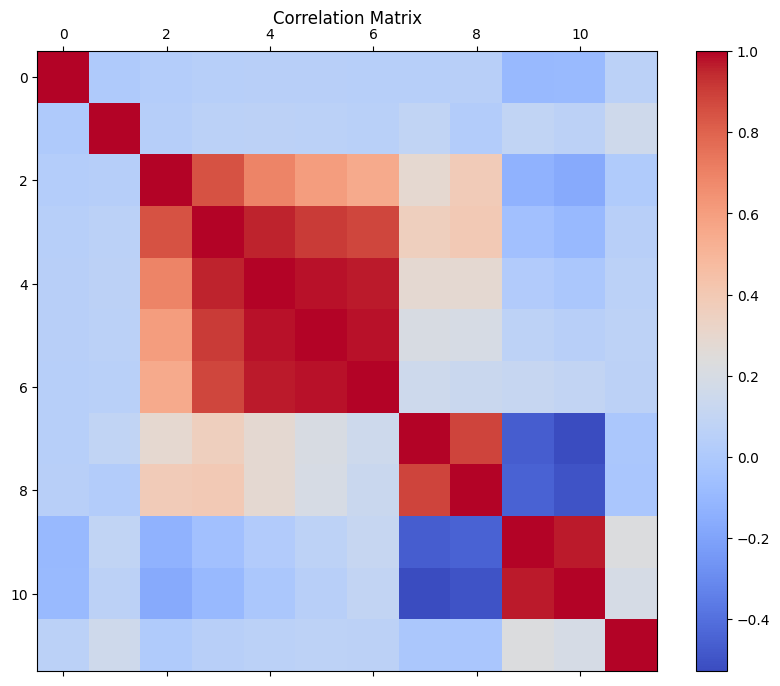

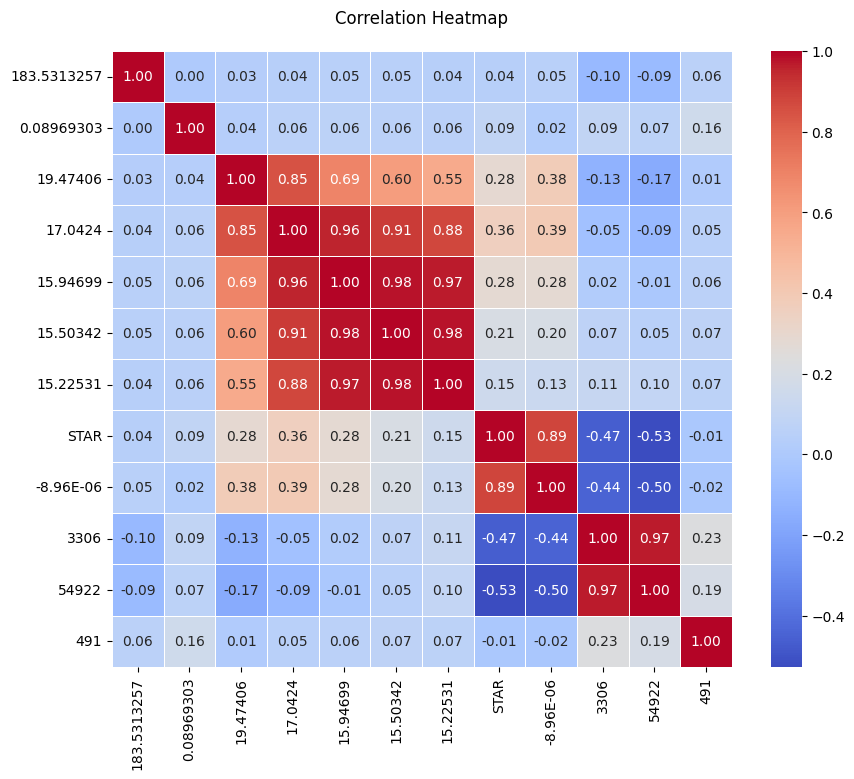

In [115]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame
# 1. Compute the correlation matrix
df['STAR'] = df['STAR'].map({'STAR': 0, 'GALAXY': 1, 'QSO': 2})
corr_matrix = df.corr()

# 2. Plot the correlation matrix using matshow (basic visualization)
plt.figure(figsize=(10, 8))
plt.matshow(corr_matrix, cmap='coolwarm', fignum=1)
plt.colorbar()
plt.title("Correlation Matrix", pad=20)
plt.show()

# 3. Plot the correlation matrix using seaborn's heatmap for better visualization
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Heatmap", pad=20)
plt.show()


**Task: Plot the correlation matrix that can be called in the pandas dataframe. (2 points)**

Hints:

Use functions of ``heatmap``, add the labels in the axes. The colormap ``coolwarm`` is nice for divergent scales like correlations that vary between -1 and 1. The argument ``center=0`` ensures that the colormap is divergent from zero. Make sure to ignore the label column "class". Remember that dropping a column can be done in place ``sdss_df.drop('class', axis=1)``.

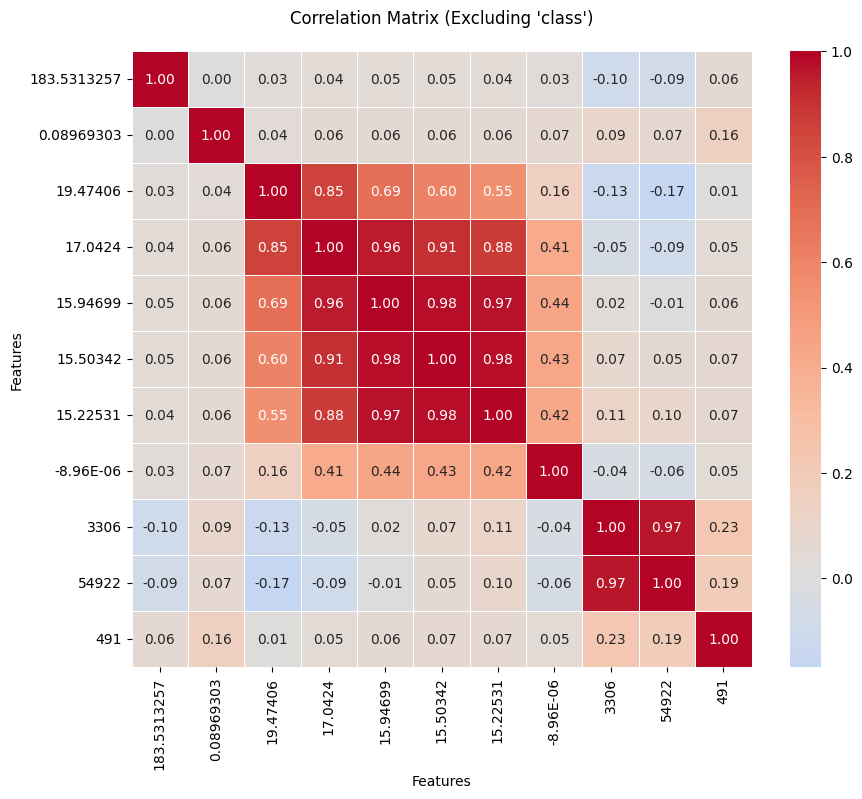

In [116]:
# Assuming df is your original DataFrame

# 1. Drop the 'class' column from the DataFrame (ignoring it for correlation analysis)
df_without_class = df_original.drop('STAR', axis=1)

# 2. Compute the correlation matrix
corr_matrix = df_without_class.corr()

# 3. Create a heatmap using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, center=0)

# 4. Add labels and a title to the plot
plt.title("Correlation Matrix (Excluding 'class')", pad=20)
plt.xlabel("Features")
plt.ylabel("Features")

# Show the plot
plt.show()


**Task: Reproduce the same plot for each of the three classes. (1 point)**
You can select the values from the pandas dataframe by selecting over the column 'class'. 

Index(['183.5313257', '0.08969303', '19.47406', '17.0424', '15.94699',
       '15.50342', '15.22531', 'STAR', '-8.96E-06', '3306', '54922', '491'],
      dtype='object')
df_star rows    183.5313257  0.08969303  19.47406   17.0424  15.94699  15.50342  752  301  \
0   183.680207    0.126185  19.38298  18.19169  17.47428  17.08732  752  301   
1   183.864379    0.019201  19.38322  17.88995  17.10537  16.66393  752  301   
2   183.973498    0.081626  18.67249  17.71375  17.49362  17.28284  752  301   
3   184.189574    0.099482  19.25667  17.54869  16.63578  16.14922  752  301   
4   184.380919    0.174323  17.81661  16.86976  16.53884  16.19576  752  301   

   4  267   3.72236E+18  STAR  -8.96E-06  3306  54922  491  
0  4  268  3.232740e+17     0   0.123111   287  52023  513  
1  4  269  3.232870e+17     0   0.100242   287  52023  559  
2  4  270  3.243690e+17     0   0.040508   288  52000  400  
3  4  271  3.243660e+17     0   0.072087   288  52000  389  
4  4  273  3.233070e+17     0  

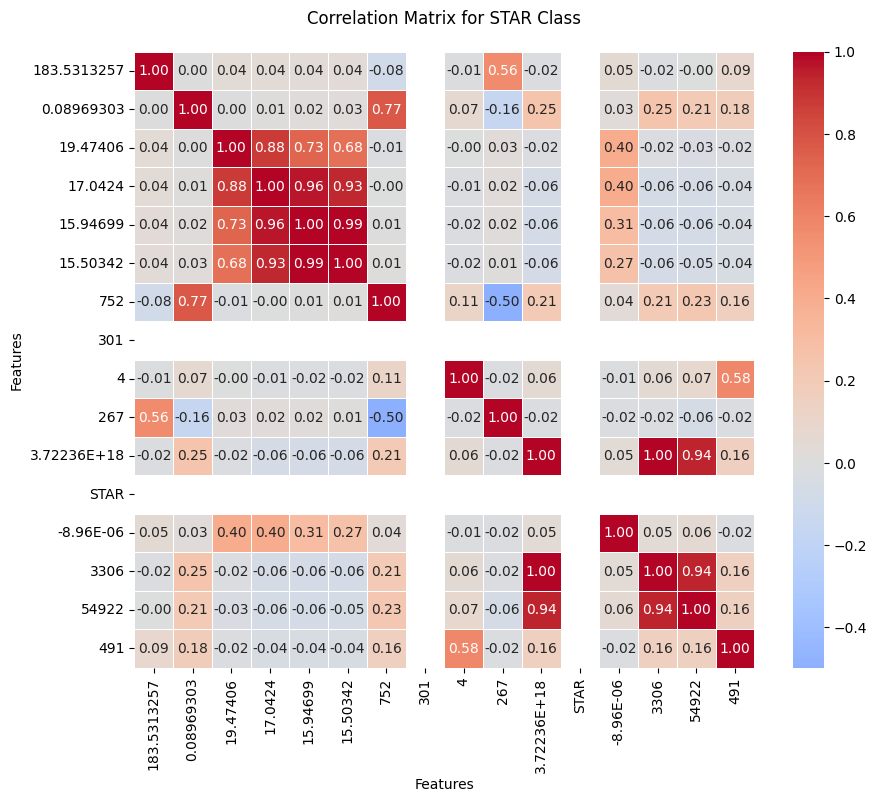

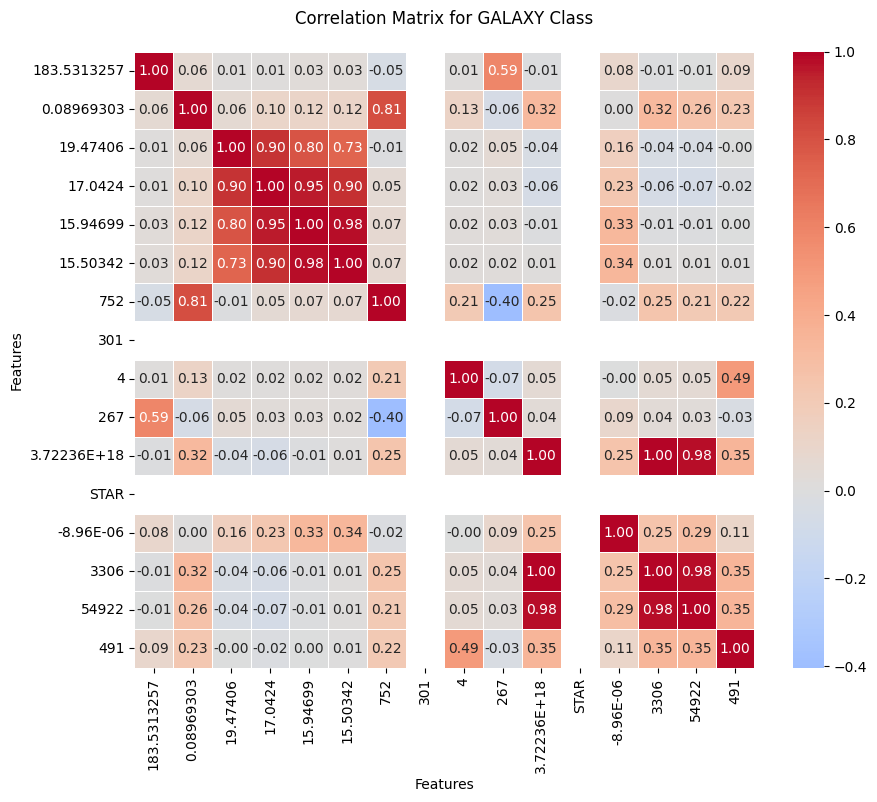

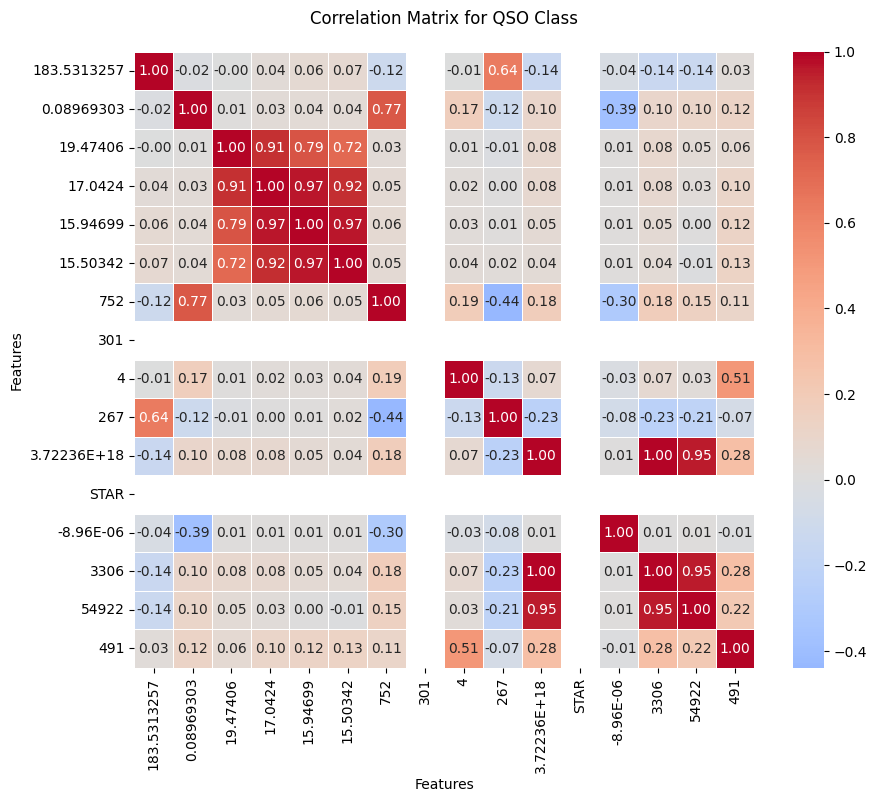

In [117]:
import matplotlib.pyplot as plt
# Assuming df is your original DataFrame
print(df_original.columns)

"""
Cell generated by Data Wrangler.
"""
'''def clean_data(df_original):
    # Filter rows based on class values in the 'STAR' column
    df_star = df_original[df_original['STAR'].apply(str).str.contains("STAR", regex=False, na=False)]
    df_galaxy = df_original[df_original['STAR'].apply(str).str.contains("GALAXY", regex=False, na=False)]
    df_qso = df_original[df_original['STAR'].apply(str).str.contains("QSO", regex=False, na=False)]
    
    # Return the filtered DataFrames for each class
    return df_star, df_galaxy, df_qso'''

# Load the data from CSV files
df_star = pd.read_csv("df_star.csv")
df_galaxy = pd.read_csv("df_galaxy.csv")
df_qso = pd.read_csv("df_qso.csv")

# Display the first few rows of the df_star to check the result
print("df_star rows", df_star.head())

'''# Define the target column index (e.g., 8 for the 'class' column)
column_index = 11  # Adjust based on the actual column index of interest
target_star = [0]'''

'''# Initialize empty dictionaries to store DataFrames for each class
class_data = {'STAR': [], 'GALAXY': [], 'QSO': []}'''

'''# Loop through each row and check the value in the target column
for idx, row in df_original.iterrows():
    class_value = row.iloc[column_index]  # Get value from the target column
    if class_value in target_star:  # Check if the value is one of the target classes
        class_data[class_value].append(idx)  # Save the row index for matching classes
'''
'''print(class_data)
#df_galaxy = df_original.loc[class_data['GALAXY']]
#df_qso = df_original.loc[class_data['QSO']]

print("df_star", df_star)'''
corr_star = df_star.corr()
corr_galaxy = df_galaxy.corr()
corr_qso = df_qso.corr()
# 3. Plot the correlation matrix for each class

# Plot for "STAR" class
plt.figure(figsize=(10, 8))
sns.heatmap(corr_star, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, center=0)
plt.title("Correlation Matrix for STAR Class", pad=20)
plt.xlabel("Features")
plt.ylabel("Features")
plt.show()

# Plot for "GALAXY" class
plt.figure(figsize=(10, 8))
sns.heatmap(corr_galaxy, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, center=0)
plt.title("Correlation Matrix for GALAXY Class", pad=20)
plt.xlabel("Features")
plt.ylabel("Features")
plt.show()

# Plot for "QSO" class
plt.figure(figsize=(10, 8))
sns.heatmap(corr_qso, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, center=0)
plt.title("Correlation Matrix for QSO Class", pad=20)
plt.xlabel("Features")
plt.ylabel("Features")
plt.show()


**Task: Can you comment on groups of observations that can be grouped together or that appear independent from each other given these correlations, and if there is any difference between the three celestial objects? (**1 point**)**

In [118]:
'''The data related to camera and image processing seems to have a strong correlation. 
The spectrograph data seems uncorrelated to each other. '''

'The data related to camera and image processing seems to have a strong correlation. \nThe spectrograph data seems uncorrelated to each other. '

In [119]:
import pandas as pd

# Specify new column names while loading the CSV
df_RS_star = pd.read_csv("df_RS_star.csv", names=[ "Object Identifier",  # objid
    "J2000 Right Ascension (r-band)",  # ra
    "J2000 Declination (r-band)",  # dec
    "Run Number",  # run
    "Rerun Number",  # rerun
    "Camera Column",  # camcol
    "Field Number",  # field
    "Spectroscopic Object Identifier",  # specobjid
    "class",  # class
    "Redshift",  # redshift
    "Plate Number",  # plate
    "Modified Julian Date",  # mjd
    "Fiber ID"]  # fiberid, header=None
)

df_RS_galaxy = pd.read_csv("df_RS_galaxy.csv", names=[ "Object Identifier",  # objid
    "J2000 Right Ascension (r-band)",  # ra
    "J2000 Declination (r-band)",  # dec
    "Run Number",  # run
    "Rerun Number",  # rerun
    "Camera Column",  # camcol
    "Field Number",  # field
    "Spectroscopic Object Identifier",  # specobjid
    "class",  # class
    "Redshift",  # redshift
    "Plate Number",  # plate
    "Modified Julian Date",  # mjd
    "Fiber ID"]  # fiberid, header=None
)

df_RS_qso = pd.read_csv("df_RS_qso.csv", names=[ "Object Identifier",  # objid
    "J2000 Right Ascension (r-band)",  # ra
    "J2000 Declination (r-band)",  # dec
    "Run Number",  # run
    "Rerun Number",  # rerun
    "Camera Column",  # camcol
    "Field Number",  # field
    "Spectroscopic Object Identifier",  # specobjid
    "class",  # class
    "Redshift",  # redshift
    "Plate Number",  # plate
    "Modified Julian Date",  # mjd
    "Fiber ID"]  # fiberid, header=None
)

### 1.5 Data exploration
Given the structure of the correlations, we will explore the values of the data.

#### 1.5.a. Distributions of redshift
"redshifting" happens when the source of light is becoming more distant to the receiver: the object is moving away from Earth. 

**Task: plot histograms for the 'redshift' feature column for each class (1 point).**

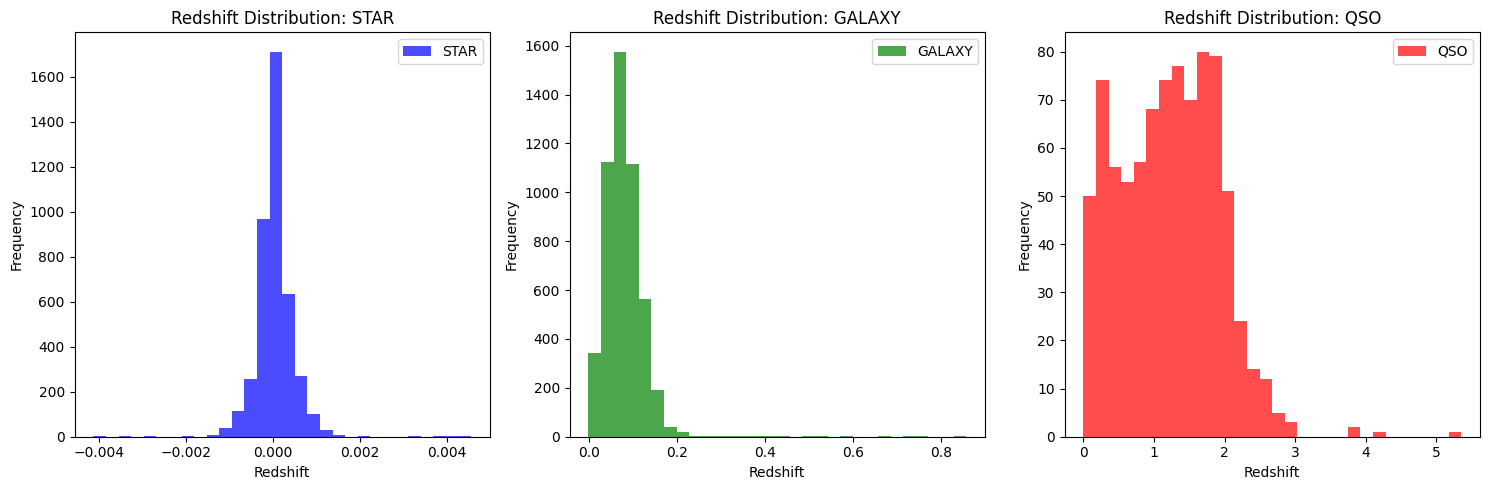

In [120]:
import pandas as pd
import matplotlib.pyplot as plt

# Plot histograms for redshift data
plt.figure(figsize=(15, 5))

# Histogram for STAR
plt.subplot(1, 3, 1)  # 1 row, 3 columns, 1st plot
plt.hist(df_RS_star['Redshift'], bins=30, color='blue', alpha=0.7, label='STAR')
plt.title('Redshift Distribution: STAR')
plt.xlabel('Redshift')
plt.ylabel('Frequency')
plt.legend()

# Histogram for GALAXY
plt.subplot(1, 3, 2)  # 1 row, 3 columns, 2nd plot
plt.hist(df_RS_galaxy['Redshift'], bins=30, color='green', alpha=0.7, label='GALAXY')
plt.title('Redshift Distribution: GALAXY')
plt.xlabel('Redshift')
plt.ylabel('Frequency')
plt.legend()

# Histogram for QSO
plt.subplot(1, 3, 3)  # 1 row, 3 columns, 3rd plot
plt.hist(df_RS_qso['Redshift'], bins=30, color='red', alpha=0.7, label='QSO')
plt.title('Redshift Distribution: QSO')
plt.xlabel('Redshift')
plt.ylabel('Frequency')
plt.legend()

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


**Task : Describe briefly the difference between the three histograms. (0.5 point)**

<!-- # answer -->
* **Star: Stars are centered and are visually Gaussian in approximation.** 

* **Galaxy: Galaxies are shifted to the right, but have a similar distribution to stars.** 

* **QSO: Quasars are entirely different than stars. Not only are they shifted to the right, they don't appear to have a meaningful distribution beyond an apparent range** 


#### 1.5.b. Right ascension (ra) and declination (dec) 

We will now plot the right ascension versus the declination depending on the class. You can use the ``lmplot`` function in ``seaborn`` (https://seaborn.pydata.org/generated/seaborn.lmplot.html) to represent the sky view of these objects.

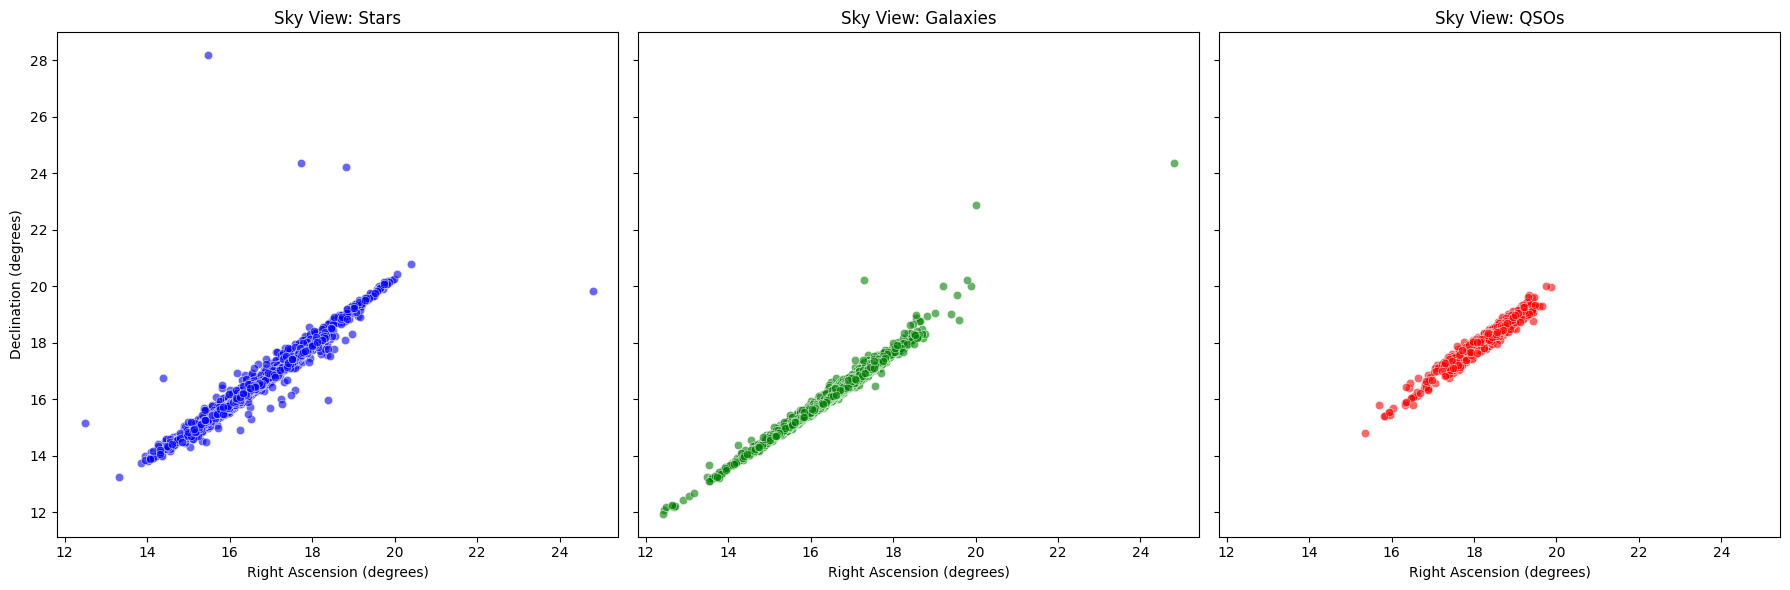

In [121]:
# Set up the plotting area
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharex=True, sharey=True)

# Plot for STAR
sns.scatterplot(
    data=df_RS_star,
    x="J2000 Right Ascension (r-band)",
    y="J2000 Declination (r-band)",
    ax=axes[0],
    color="blue",
    alpha=0.6
)
axes[0].set_title("Sky View: Stars")
axes[0].set_xlabel("Right Ascension (degrees)")
axes[0].set_ylabel("Declination (degrees)")

# Plot for GALAXY
sns.scatterplot(
    data=df_RS_galaxy,
    x="J2000 Right Ascension (r-band)",
    y="J2000 Declination (r-band)",
    ax=axes[1],
    color="green",
    alpha=0.6
)
axes[1].set_title("Sky View: Galaxies")
axes[1].set_xlabel("Right Ascension (degrees)")
axes[1].set_ylabel("")

# Plot for QSO
sns.scatterplot(
    data=df_RS_qso,
    x="J2000 Right Ascension (r-band)",
    y="J2000 Declination (r-band)",
    ax=axes[2],
    color="red",
    alpha=0.6
)
axes[2].set_title("Sky View: QSOs")
axes[2].set_xlabel("Right Ascension (degrees)")
axes[2].set_ylabel("")

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

**Task: do you see any obvious differences such that one could easily discriminate between the two coordinates? (0.5 point)**

In [122]:
'''I mean they're inversely proportional, but they seem quite isomorphic.'''

"I mean they're inversely proportional, but they seem quite isomorphic."

#### 1.5.c Filters - u,g,r,i,z 

Recall: u, g, r, i, z represent the different wavelengths which are used to capture the observations. According to the correlation matrix, they are correlated for all three classes.

Therefore it is interesting to see that band 'u' is less correlated to the other bands. 

**Task Plot histograms and discuss why you expect these features to be correlated (1 points)**

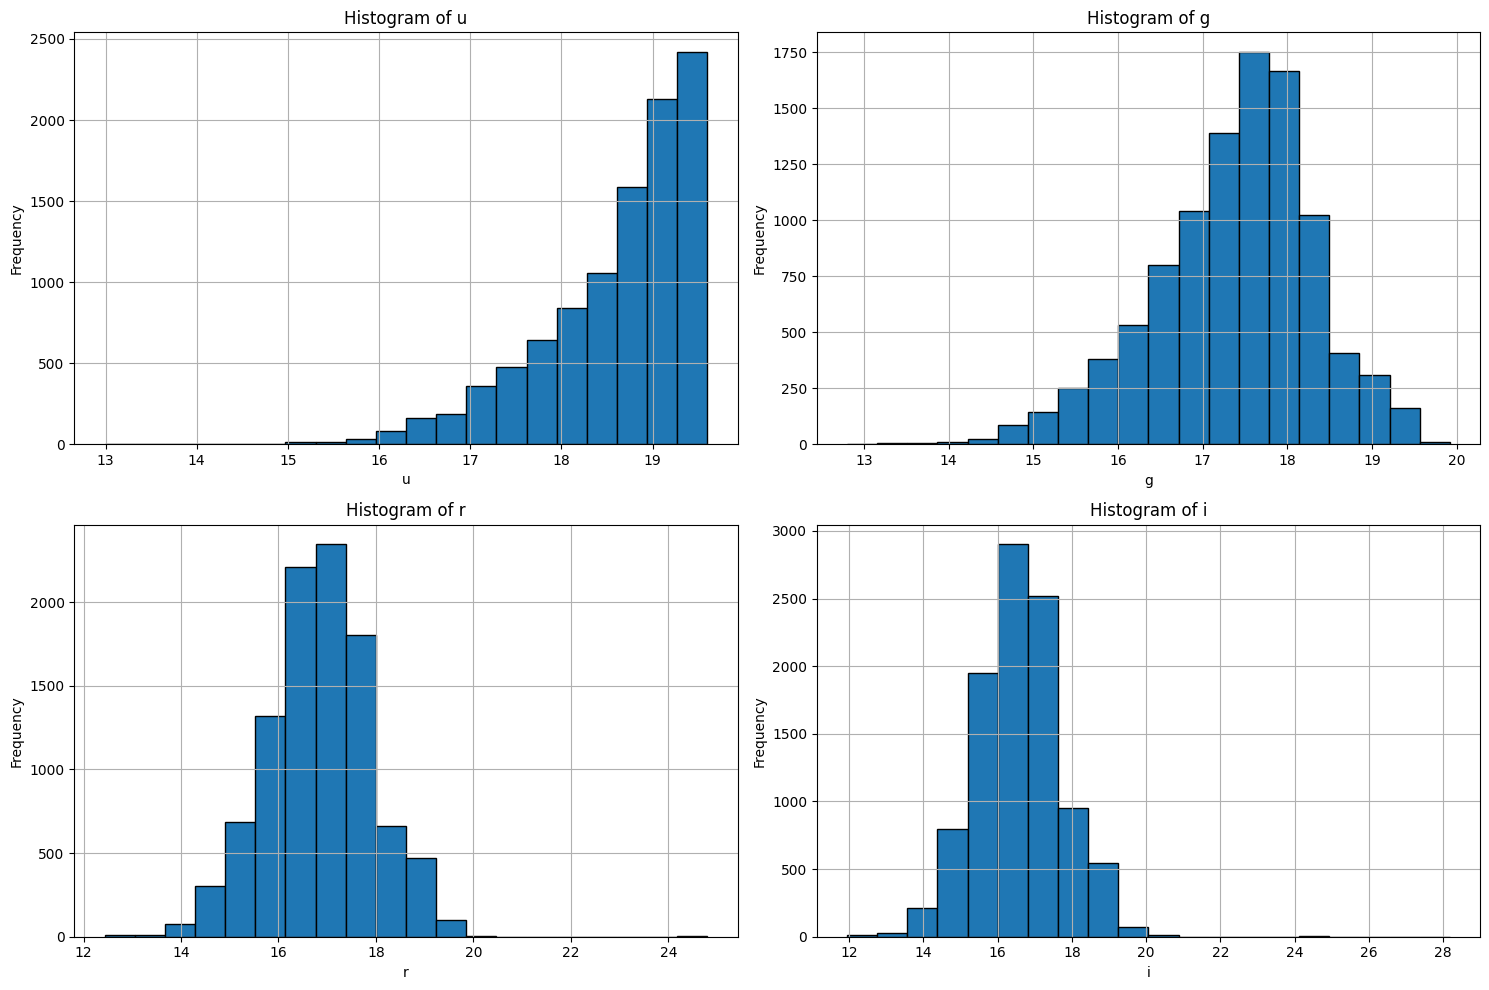

In [123]:
# Renaming the columns based on the provided list
columns_renamed = [
    "J2000 Right Ascension (r-band)",  # ra
    "J2000 Declination (r-band)",  # dec
    "u",  # u
    "g",  # g
    "r",  # r
    "i",  # i
    "z",  # z
    "class", #object class
    "Final Redshift",  # redshift
    "Plate Number",  # plate
    "Modified Julian Date",  # mjd
    "Fiber ID"  # fiberid
]

# Rename the columns in the dataframe
df.columns = columns_renamed

# Select columns 3 through 6 for plotting (which are "u", "g", "r", "i")
columns_to_plot = df.columns[2:6]

# Plot histograms for columns 3 through 6
plt.figure(figsize=(15, 10))

for i, col in enumerate(columns_to_plot, start=1):
    plt.subplot(2, 2, i)  # Create a 2x2 grid of subplots
    df[col].dropna().hist(bins=20, edgecolor='black')  # Drop NaN values and plot histogram
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")

# Adjust layout
plt.tight_layout()
plt.show()


<!-- Anwer: -->

### 1.6 Data Dimensionality Reduction
At this point, we are left with 8 features: redshift, u, g, r, i, z, ra, and dec. Among these, the filters (u, g, r, i, z) are correlated to each other. There is therefore a potential for reducing the dimensions of the features using PCA on these 5 features.

We will use the skilearn function ``sklearn.decomposition.PCA()`` to fit and transform the data into the PC coordinates. Lets' first explore how many PCs we need. Fit the PCA function over the total number of filters. You will fit the PCA function over an array with the columns selected from the dataframe. 

**Task: Perform the PCA over a max number of PCs, output the explained variance ratio values, decide on an appropriate maximum number of PC to use (6 points)**

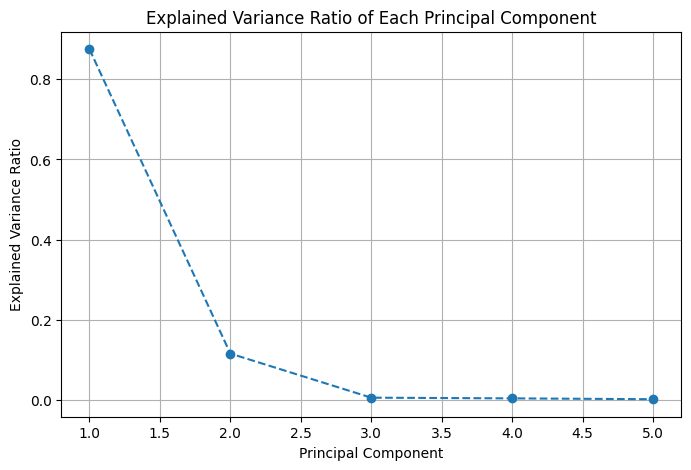

Explained Variance Ratio for Each Principal Component: [0.87525908 0.11518755 0.00505046 0.00332068 0.00118223]


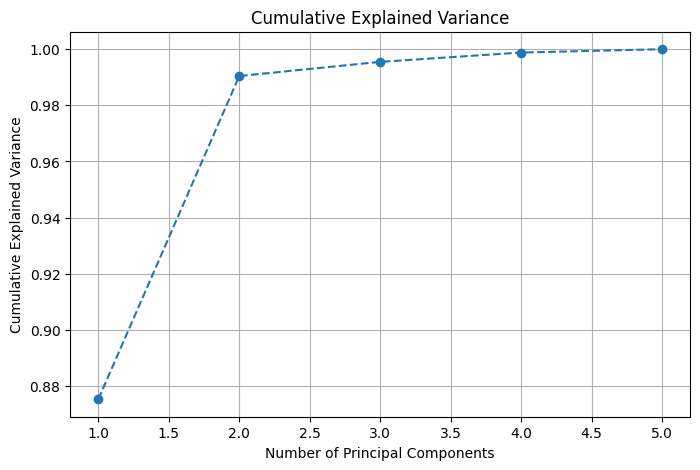

Cumulative Explained Variance: [0.87525908 0.99044663 0.99549709 0.99881777 1.        ]
Number of PCs to retain (explains at least 95% variance): 2


In [124]:
from sklearn.decomposition import PCA

# Assuming df is your DataFrame and it has been properly renamed and cleaned

# Select the columns for u, g, r, i, z
filters = df[['u', 'g', 'r', 'i', 'z']]

# Standardize the data before applying PCA (important for PCA)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
filters_scaled = scaler.fit_transform(filters)

# Initialize PCA and fit it to the data
pca = PCA()
pca.fit(filters_scaled)

# Get the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Plot the explained variance ratio
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', linestyle='--')
plt.title('Explained Variance Ratio of Each Principal Component')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.grid(True)
plt.show()

# Print the explained variance ratio
print("Explained Variance Ratio for Each Principal Component:", explained_variance_ratio)

# Calculate the cumulative explained variance
cumulative_explained_variance = explained_variance_ratio.cumsum()

# Plot the cumulative explained variance
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='--')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

# Print cumulative explained variance
print("Cumulative Explained Variance:", cumulative_explained_variance)

# Decide the number of PCs based on the cumulative explained variance (e.g., 95% threshold)
n_pcs_to_use = (cumulative_explained_variance >= 0.95).argmax() + 1
print(f"Number of PCs to retain (explains at least 95% variance): {n_pcs_to_use}")


*Answer on how many PCs to use*



In [125]:
'''We should use three PCs because 95% of the variance can be explain with just three.'''

'We should use three PCs because 95% of the variance can be explain with just three.'

We will now re-perform PCA with the number of PCs you found is most appropriate. Re-apply the fit-transform function. Update the dataframe by adding the PCA value(s) and dropping the columns of the 5 filter features.

**Task: PCA again, fit and transform, update the dataframe with the new feature(s) (3 points)**

In [126]:
from sklearn.preprocessing import StandardScaler

# Assuming df is your original DataFrame and contains the 'u', 'g', 'r', 'i', 'z' columns

# Select the columns for u, g, r, i, z
filters = df[['u', 'g', 'r', 'i', 'z']]

# Standardize the data before applying PCA
scaler = StandardScaler()
filters_scaled = scaler.fit_transform(filters)

# Initialize PCA with the number of components we found to be appropriate
# In this case, let's say n_pcs_to_use = 3 based on previous analysis
n_pcs_to_use = 3  # Update this based on your previous calculation

pca = PCA(n_components=n_pcs_to_use)

# Apply PCA and transform the data
pca_result = pca.fit_transform(filters_scaled)

# Create a DataFrame for the PCA components
pca_columns = [f'PC{i+1}' for i in range(n_pcs_to_use)]  # Generate column names for PCs
pca_df = pd.DataFrame(pca_result, columns=pca_columns)

# Update the original DataFrame by dropping the original filter columns and adding the PCA components
df_updated = df.drop(columns=['u', 'g', 'r', 'i', 'z'])  # Drop the original filter columns
df_updated = pd.concat([df_updated, pca_df], axis=1)  # Add the new PCA columns

# Display the updated DataFrame
print(df_updated.head())


   J2000 Right Ascension (r-band)  J2000 Declination (r-band)  class  \
0                      183.598370                    0.135285      0   
1                      183.680207                    0.126185      1   
2                      183.870529                    0.049911      0   
3                      183.883288                    0.102557      0   
4                      183.847174                    0.173694      0   

   Final Redshift  Plate Number  Modified Julian Date  Fiber ID       PC1  \
0          1437.0           323                 51615       541 -0.181650   
1          8221.0           287                 52023       513  1.375859   
2          1162.0          3306                 54922       510 -1.504168   
3          3500.0          3306                 54922       512 -1.148087   
4          3045.0           324                 51666       594  2.681894   

        PC2       PC3  
0  0.070952 -0.150535  
1  0.574554  0.145152  
2 -0.573788 -0.006858  
3 -1.290

## 2. Unsupervised Clustering with KMeans (20 points)

In this section, we will explore if the data features will be sufficient for classification. As a first exploration, we will perform unsupervised classification with Kmeans clustering.

## 2.1 Perform preliminary Kmeans (10 points)

Implement Kmeans here for a given number of clusters and on the features of interest. Choose 3 features.
* Use ``sklearn`` to perform Kmeans.
* Repeat Kmeans and discuss (in a markdown cell) the stability of clustering (e.g., use visualization to qualitatively assess the stability).


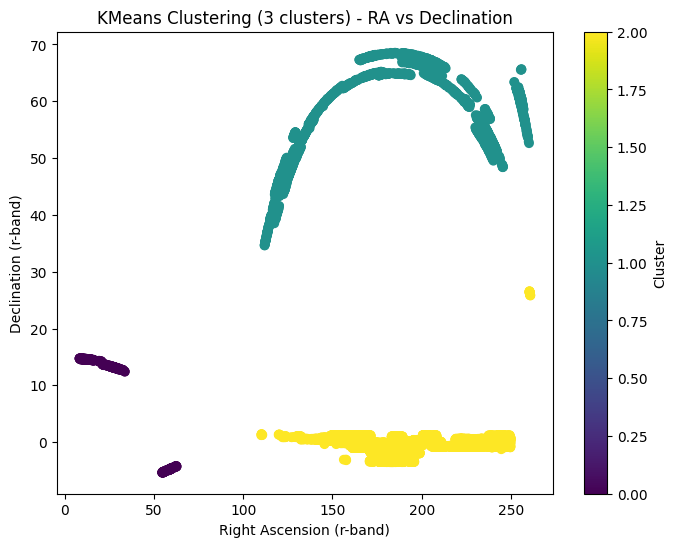

In [127]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Select the three features of interest (e.g., 'redshift', 'ra', and 'dec')
features_of_interest = df[['Final Redshift', 'J2000 Right Ascension (r-band)', 'J2000 Declination (r-band)']]

# Standardize the data before applying KMeans (important for clustering algorithms)
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features_of_interest)

# Perform KMeans clustering for a given number of clusters (e.g., 3 clusters)
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(features_scaled)

# Plot the clustering result: Use redshift vs. RA for x and y axes
plt.figure(figsize=(8, 6))
plt.scatter(df['J2000 Right Ascension (r-band)'], df['J2000 Declination (r-band)'], c=df['Cluster'], cmap='viridis')
plt.title('KMeans Clustering (3 clusters) - RA vs Declination')
plt.xlabel('Right Ascension (r-band)')
plt.ylabel('Declination (r-band)')
plt.colorbar(label='Cluster')
plt.show()


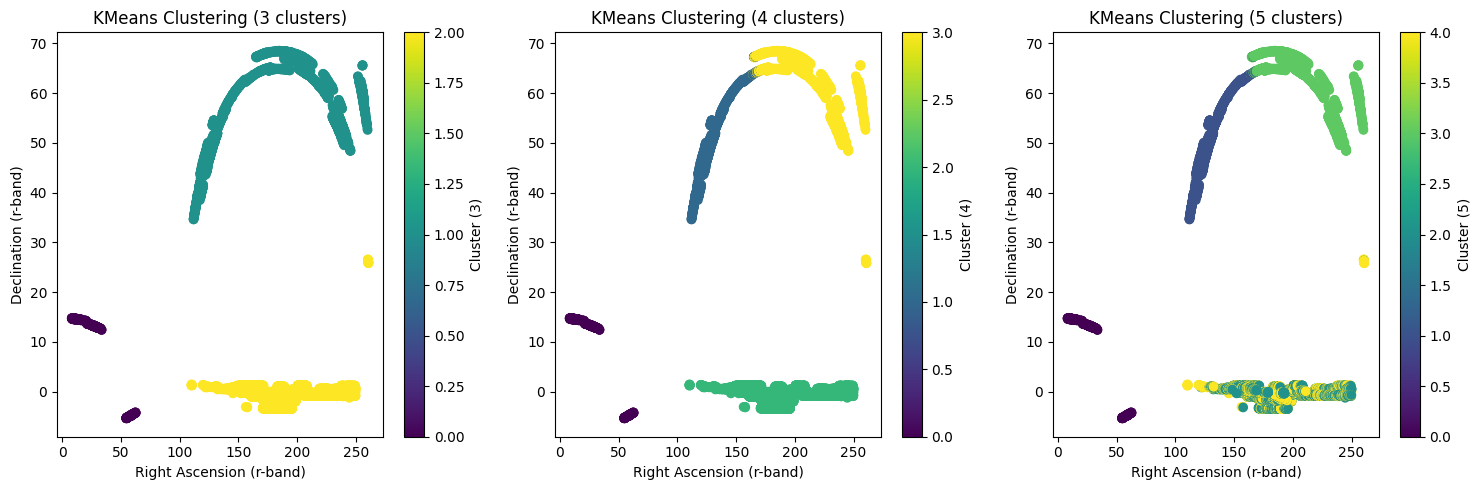

In [128]:
# Repeat KMeans clustering for different numbers of clusters and visualize the results
n_clusters_list = [3, 4, 5]  # Example cluster numbers to check stability

# Create a plot for each clustering result
plt.figure(figsize=(15, 5))

for i, n_clusters in enumerate(n_clusters_list, 1):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    df[f'Cluster_{n_clusters}'] = kmeans.fit_predict(features_scaled)
    
    plt.subplot(1, len(n_clusters_list), i)
    plt.scatter(df['J2000 Right Ascension (r-band)'], df['J2000 Declination (r-band)'], c=df[f'Cluster_{n_clusters}'], cmap='viridis')
    plt.title(f'KMeans Clustering ({n_clusters} clusters)')
    plt.xlabel('Right Ascension (r-band)')
    plt.ylabel('Declination (r-band)')
    plt.colorbar(label=f'Cluster ({n_clusters})')

plt.tight_layout()
plt.show()


## 2.2 Find the optimal number of clusters (5 points)

Use a method to establish the optimal number of clusters.

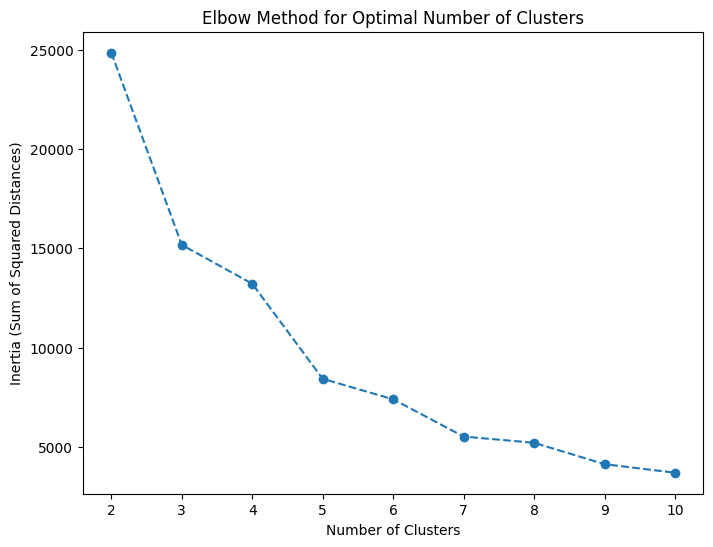

In [129]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Select the three features of interest (e.g., 'redshift', 'ra', and 'dec')
features_of_interest = df[['Final Redshift', 'J2000 Right Ascension (r-band)', 'J2000 Declination (r-band)']]

# Standardize the data
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features_of_interest)

# Apply the Elbow Method
inertia_values = []
k_range = range(2, 11)  # Check for cluster numbers between 2 and 10

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features_scaled)
    inertia_values.append(kmeans.inertia_)

# Plot the Elbow Method
plt.figure(figsize=(8, 6))
plt.plot(k_range, inertia_values, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia (Sum of Squared Distances)')
plt.show()


## 2.3 Discuss performance of clustering ( 5 points)

1. Perform silhouette analysis (silhouette visualization and score)

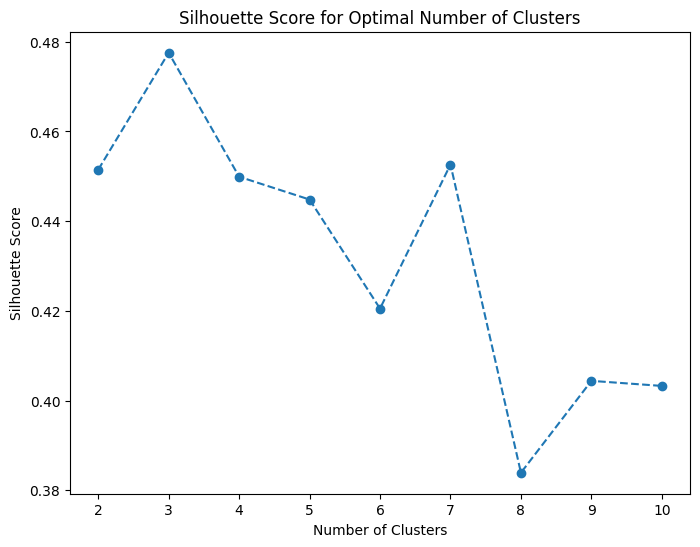

In [130]:
from sklearn.metrics import silhouette_score

# List to store silhouette scores
silhouette_scores = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(features_scaled)
    
    # Calculate silhouette score
    score = silhouette_score(features_scaled, cluster_labels)
    silhouette_scores.append(score)

# Plot the Silhouette Scores
plt.figure(figsize=(8, 6))
plt.plot(k_range, silhouette_scores, marker='o', linestyle='--')
plt.title('Silhouette Score for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()


2. Calculate (python cell) and discuss (net markdown cell) homogeneity with respect to the ground truth labels using 3 appropriate metrics.

Number of NaN values in true labels: 0
Homogeneity Score: 0.3659
Adjusted Rand Index (ARI): 0.3347
Normalized Mutual Information (NMI): 0.3373


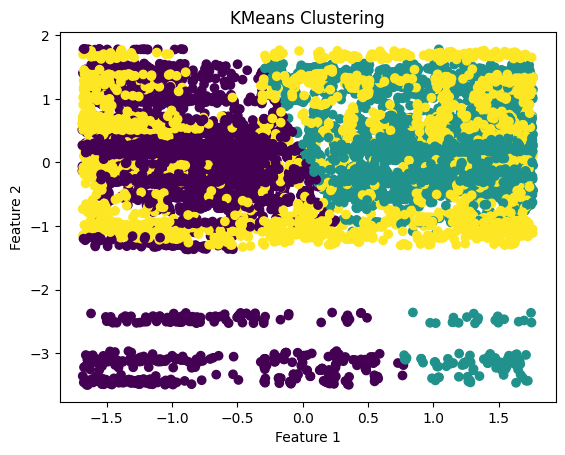

In [138]:
from sklearn.metrics import homogeneity_score, adjusted_rand_score, normalized_mutual_info_score
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Assuming we already have the ground truth labels as 'true_labels' and the KMeans clustering result as 'predicted_labels'

# For example, let's assume true_labels is available in your dataset:
true_labels = df['class']
# Select the features for clustering (e.g., 'redshift', 'ra', and 'dec')
features_of_interest = df[['Final Redshift', 'J2000 Right Ascension (r-band)', 'J2000 Declination (r-band)']]

# Standardize the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features_of_interest)

# Perform KMeans clustering with the chosen number of clusters (e.g., 3)
kmeans = KMeans(n_clusters=3, random_state=69, n_init=10)
predicted_labels = kmeans.fit_predict(features_scaled)
# Check for missing values in your dataset
nan_indices = np.isnan(true_labels)

# Print the number of NaN values
print(f"Number of NaN values in true labels: {np.sum(nan_indices)}")
# Calculate the three homogeneity metrics
homogeneity = homogeneity_score(true_labels, predicted_labels)
ari = adjusted_rand_score(true_labels, predicted_labels)
nmi = normalized_mutual_info_score(true_labels, predicted_labels)

# Print the results
print(f"Homogeneity Score: {homogeneity:.4f}")
print(f"Adjusted Rand Index (ARI): {ari:.4f}")
print(f"Normalized Mutual Information (NMI): {nmi:.4f}")

plt.scatter(features_scaled[:, 0], features_scaled[:, 1], c=predicted_labels, cmap='viridis')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('KMeans Clustering')
plt.show()


In [133]:
from sklearn.metrics import completeness_score, homogeneity_score, fowlkes_mallows_score

# Calculate the scores based on true_labels (the ground truth labels) and predicted_labels (the clustering result)
completeness = completeness_score(true_labels, predicted_labels)
homogeneity = homogeneity_score(true_labels, predicted_labels)
fowlkes_mallows = fowlkes_mallows_score(true_labels, predicted_labels)

# Print the results
print(f"Completeness Score: {completeness:.4f}")
print(f"Homogeneity Score: {homogeneity:.4f}")
print(f"Fowlkes-Mallows Score: {fowlkes_mallows:.4f}")


Completeness Score: 0.0078
Homogeneity Score: 0.0063
Fowlkes-Mallows Score: 0.4930


**Question:**
After performing KMeans clustering and calculating the completeness, homogeneity, and Fowlkes-Mallows scores, how can you determine if these scores are good? Compare the obtained scores to the ideal values and explain what each score indicates about the clustering quality. What do you find from your results?

The scores range from zero to one, so the Kmeans clustering doesn't seem complete or homogenous. It seems moderately clustered, but I don't think it works well because there are way fewer quasars in the data set. 

## 3 Machine Learning Models (30 points)

We will now train different models on this dataset. We have a total of 8 features, 3 classes, and 10,000 samples. We will use K-Nearest Neighbors, Naive Bayes, Random Forest, Support Vector Machine, Multi Layer Perceptron.

We now follow a normal machine learning workflow:
* Feature scaling (3) points)
* Train/test set split (2 points)
* Model design, training, testing (15 points)
* Model comparisons, pick your winner, discuss feature importance using Random Forest. (10 points)

### 3.1 Feature Scaling
Scaling all values to be within the (0, 1) interval will reduce the distortion due to exceptionally high values and make some algorithms converge faster. You can scale the features only by dropping the "class" column without modifying the dataframe in place, using the pandas function ``drop()``.

**Task: Scale just the features (3 points)**

In [140]:
from sklearn.preprocessing import MinMaxScaler

# Assuming 'df' is your DataFrame with the features and 'Object Class' column
# Drop the 'Object Class' column for scaling
df_features = df.drop(columns=['class'])

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Scale the features
df_scaled = pd.DataFrame(scaler.fit_transform(df_features), columns=df_features.columns)

# Optionally, add the 'Object Class' column back to the scaled dataframe
#df_scaled['Object Class'] = df['Object Class']

# Show the scaled dataframe
print(df_scaled.head())


   J2000 Right Ascension (r-band)  J2000 Declination (r-band)         u  \
0                        0.694098                    0.074642  0.858250   
1                        0.694422                    0.074519  0.967188   
2                        0.695175                    0.073487  0.722499   
3                        0.695225                    0.074199  0.689960   
4                        0.695082                    0.075162  0.974501   

          g         r         i         z  Final Redshift  Plate Number  \
0  0.620126  0.343138  0.279811  0.426021        0.149144      0.006999   
1  0.757385  0.407640  0.316657  0.462532        0.853243      0.002579   
2  0.534197  0.301490  0.248584  0.382616        0.120602      0.373281   
3  0.486538  0.323925  0.283858  0.445782        0.363259      0.373281   
4  0.796166  0.463436  0.373791  0.573050        0.316035      0.007122   

   Modified Julian Date  Fiber ID  Cluster  Cluster_3  Cluster_4  Cluster_5  
0              0.006

### 3.2 Test, train, validation data sets.
**Task: Split the data into a training and a test part.  (2 points)**

The models will be trained on the training data set and tested on the test data set

In [142]:
from sklearn.model_selection import train_test_split

# Assuming 'df_scaled' is your scaled dataframe with features and the 'Object Class' as the target
# Separate the features (X) and target labels (y)
X = df_features  # Features (excluding the 'Object Class' column)
y = df['class']  # Target labels (the 'Object Class' column)

# Split the data into training and test sets (80% training, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the sizes of the training and test sets
print(f"Training set size: {X_train.shape[0]} samples")
print(f"Test set size: {X_test.shape[0]} samples")


Training set size: 7999 samples
Test set size: 2000 samples


Computation time is important to account for when scaling up the data set and the model size. You can evaluate the relative computational time using the function ``time.perf_counter()`` to evaluate the absolute time. Then compare the computational time by making the difference between two time stamps:

``t1=time.perf_counter()``

``t2=time.perf_counter()``

``tcomp = t2 - t1``

We will also assess the model performance of these multi-class classifiers. We will evaluate the average of the scores over the 3 class labels.

In [146]:
import time
from sklearn.ensemble import RandomForestClassifier  # Example classifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Start the timer
t1 = time.perf_counter()

# Stop the timer
t2 = time.perf_counter()

# Calculate the computational time
tcomp = t2 - t1
print(f"Computation time: {tcomp:.4f} seconds")


Computation time: 0.0000 seconds


In the following, we will be testing over several classifiers. Follow the steps:
1. model definition/design
2. training
3. prediction on test
4. evaluation: a) print the classification_report; b) save the precision, recall, fscore and accuracy in variables

### 3.3.a K Nearest Neighbors (3 points)
Check out the function arguments and definition here: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

In [144]:
from sklearn.neighbors import KNeighborsClassifier  # KNN Classifier

# Start the timer
t1 = time.perf_counter()

# Initialize and train a K-Nearest Neighbors Classifier
knn = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors
knn.fit(X_train, y_train)

# Stop the timer
t2 = time.perf_counter()

# Calculate the computational time
tcomp = t2 - t1
print(f"Computation time: {tcomp:.4f} seconds")

# Make predictions
y_pred = knn.predict(X_test)

# Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')  # Average over all classes
recall = recall_score(y_test, y_pred, average='weighted')  # Average over all classes
f1 = f1_score(y_test, y_pred, average='weighted')  # Average over all classes

# Print the scores
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision (Weighted): {precision:.4f}")
print(f"Recall (Weighted): {recall:.4f}")
print(f"F1 Score (Weighted): {f1:.4f}")

Computation time: 0.0172 seconds
Accuracy: 0.9875
Precision (Weighted): 0.9875
Recall (Weighted): 0.9875
F1 Score (Weighted): 0.9875


### 3.3.b Naive Bayes (3 points)
Check out the sklearn tutorial pages here: https://scikit-learn.org/stable/modules/naive_bayes.html#naive-bayes. We propose to use the Gaussian Naive Bayes.

Naive Bayes assumes the data to be normally distributed which can be achieved by scaling using the MaxAbsScaler. For this example then we will use the unscaled data, then rescale it.

In [145]:
from sklearn.naive_bayes import GaussianNB  # Naive Bayes Classifier

# Start the timer
t1 = time.perf_counter()

# Initialize and train a Naive Bayes Classifier
nb = GaussianNB()
nb.fit(X_train, y_train)

# Stop the timer
t2 = time.perf_counter()

# Calculate the computational time
tcomp = t2 - t1
print(f"Computation time: {tcomp:.4f} seconds")

# Make predictions
y_pred = nb.predict(X_test)

# Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')  # Average over all classes
recall = recall_score(y_test, y_pred, average='weighted')  # Average over all classes
f1 = f1_score(y_test, y_pred, average='weighted')  # Average over all classes

# Print the scores
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision (Weighted): {precision:.4f}")
print(f"Recall (Weighted): {recall:.4f}")
print(f"F1 Score (Weighted): {f1:.4f}")

Computation time: 0.0060 seconds
Accuracy: 0.9455
Precision (Weighted): 0.9455
Recall (Weighted): 0.9455
F1 Score (Weighted): 0.9455


### 3.3.c Random Forest Classifier (2 points)
Check out the tutorial page here: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

In [147]:
# Start the timer
t1 = time.perf_counter()

# Initialize and train a Random Forest Classifier (you can use any classifier)
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Stop the timer
t2 = time.perf_counter()

# Calculate the computational time
tcomp = t2 - t1
print(f"Computation time: {tcomp:.4f} seconds")

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')  # Average over all classes
recall = recall_score(y_test, y_pred, average='weighted')  # Average over all classes
f1 = f1_score(y_test, y_pred, average='weighted')  # Average over all classes

# Print the scores
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision (Weighted): {precision:.4f}")
print(f"Recall (Weighted): {recall:.4f}")
print(f"F1 Score (Weighted): {f1:.4f}")


Computation time: 1.3995 seconds
Accuracy: 0.9925
Precision (Weighted): 0.9925
Recall (Weighted): 0.9925
F1 Score (Weighted): 0.9925


### 3.3.d Support Vector Machine Classifier (2 points)
Check out the sklearn information page here: https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC

In [148]:
from sklearn.svm import SVC  # Support Vector Machine Classifier

# Start the timer
t1 = time.perf_counter()

# Initialize and train a Support Vector Machine Classifier
svm = SVC(kernel='linear', random_state=42)  # You can use 'linear', 'poly', 'rbf', etc.
svm.fit(X_train, y_train)

# Stop the timer
t2 = time.perf_counter()

# Calculate the computational time
tcomp = t2 - t1
print(f"Computation time: {tcomp:.4f} seconds")

# Make predictions
y_pred = svm.predict(X_test)

# Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')  # Average over all classes
recall = recall_score(y_test, y_pred, average='weighted')  # Average over all classes
f1 = f1_score(y_test, y_pred, average='weighted')  # Average over all classes

# Print the scores
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision (Weighted): {precision:.4f}")
print(f"Recall (Weighted): {recall:.4f}")
print(f"F1 Score (Weighted): {f1:.4f}")

Computation time: 2.1193 seconds
Accuracy: 0.9880
Precision (Weighted): 0.9881
Recall (Weighted): 0.9880
F1 Score (Weighted): 0.9880


### 3.3.e Multi-Layer Perceptron (3 points)

Check out the information page here: https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html

In [149]:
from sklearn.neural_network import MLPClassifier  # Multilayer Perceptron Classifier

# Start the timer
t1 = time.perf_counter()

# Initialize and train a Multilayer Perceptron Classifier
mlp = MLPClassifier(hidden_layer_sizes=(100,), random_state=42, max_iter=1000)  # One hidden layer with 100 units
mlp.fit(X_train, y_train)

# Stop the timer
t2 = time.perf_counter()

# Calculate the computational time
tcomp = t2 - t1
print(f"Computation time: {tcomp:.4f} seconds")

# Make predictions
y_pred = mlp.predict(X_test)

# Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')  # Average over all classes
recall = recall_score(y_test, y_pred, average='weighted')  # Average over all classes
f1 = f1_score(y_test, y_pred, average='weighted')  # Average over all classes

# Print the scores
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision (Weighted): {precision:.4f}")
print(f"Recall (Weighted): {recall:.4f}")
print(f"F1 Score (Weighted): {f1:.4f}")

Computation time: 0.4099 seconds
Accuracy: 0.9825
Precision (Weighted): 0.9828
Recall (Weighted): 0.9825
F1 Score (Weighted): 0.9826


### 3.4 Model performance and comparison 

### 3.4.a Confusion Matrix and interpretation

**Task: Plot the confusion matrix (2 points)**

Use sklearn ``ConfusionMatrixDisplay" from the sklearn to visualize the confusion matrix

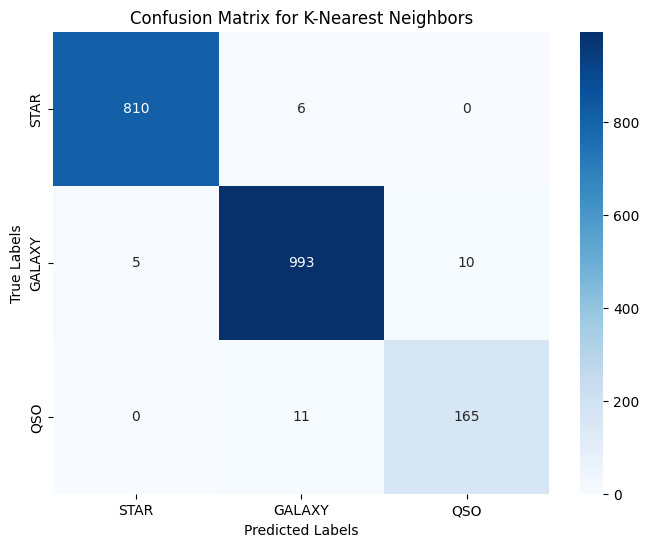

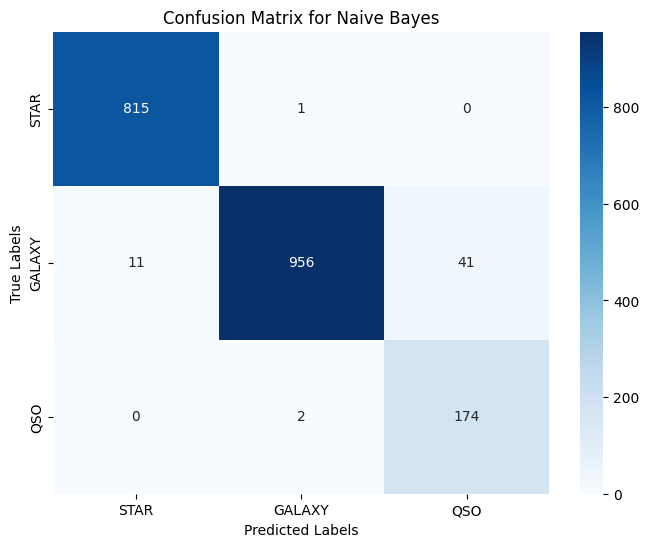

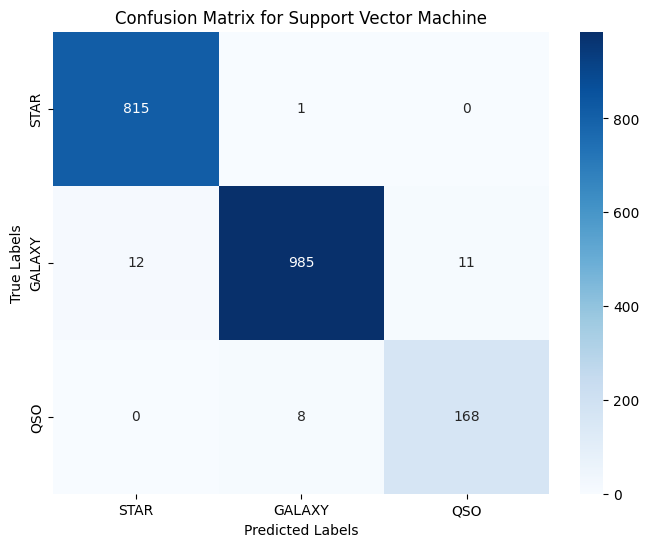

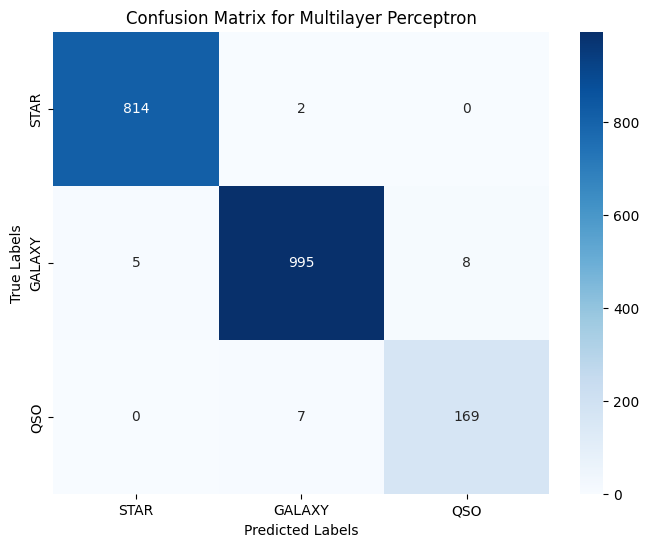

In [150]:
from sklearn.metrics import confusion_matrix

# Select the features for clustering
features_of_interest = df[['Final Redshift', 'J2000 Right Ascension (r-band)', 'J2000 Declination (r-band)']]

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features_of_interest)
y = df['class']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize models
models = {
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=3),
    'Naive Bayes': GaussianNB(),
    'Support Vector Machine': SVC(kernel='linear'),
    'Multilayer Perceptron': MLPClassifier(hidden_layer_sizes=(50,), max_iter=1000)
}

# Function to plot confusion matrix
def plot_confusion_matrix(model, X_train, X_test, y_train, y_test, model_name):
    # Train the model
    model.fit(X_train, y_train)

    # Predict the labels
    y_pred = model.predict(X_test)

    # Compute the confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Plot the confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=['STAR', 'GALAXY', 'QSO'], yticklabels=['STAR', 'GALAXY', 'QSO'])
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

# Plot confusion matrix for each model
for model_name, model in models.items():
    plot_confusion_matrix(model, X_train, X_test, y_train, y_test, model_name)

**Task: Comment on what you see the best classifier is likely to be (1 point).** You can also comment on the misclassification and confusion rates.

I think the multilayer perceptron was the best. It appears to have the fewest misclassifications and the confusion rates are low. 

### 3.4.a K Fold Cross Validation
We will now perform k fold cross valdiation for the classifiers. We use the function ``cross_val_score`` on each ewstimator, on the training set, with 10 folds, and use accuracy as a score metric.

**Task: perform the cross validation over K folds, output the mean and standard deviation of the accuracy (3 points)**

In [151]:
from sklearn.model_selection import cross_val_score

# Initialize models
models = {
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=3),
    'Naive Bayes': GaussianNB(),
    'Support Vector Machine': SVC(kernel='linear'),
    'Multilayer Perceptron': MLPClassifier(hidden_layer_sizes=(50,), max_iter=1000)
}

# Perform cross-validation for each model
for model_name, model in models.items():
    # Perform 10-fold cross-validation
    cv_scores = cross_val_score(model, X_scaled, y, cv=10, scoring='accuracy')
    
    # Output the mean and standard deviation of accuracy
    mean_accuracy = np.mean(cv_scores)
    std_accuracy = np.std(cv_scores)
    
    print(f"{model_name} - Mean Accuracy: {mean_accuracy:.4f}, Standard Deviation: {std_accuracy:.4f}")


K-Nearest Neighbors - Mean Accuracy: 0.9794, Standard Deviation: 0.0068
Naive Bayes - Mean Accuracy: 0.9696, Standard Deviation: 0.0087
Support Vector Machine - Mean Accuracy: 0.9854, Standard Deviation: 0.0034
Multilayer Perceptron - Mean Accuracy: 0.9866, Standard Deviation: 0.0034


**Task: Which method won the Xval test (1 point) ?**

see the cell below

The multilayer perceptron method won the cross validation test. 

<!-- answer here -->





### 3.4.c And the winner is ...

Let's compare the results. 
**Task: Create a pandas dataframe with all of the performance metrics, including the results from K-fold cross validation. (2 points)**

In [153]:
from sklearn.model_selection import cross_val_score

'''model = SVC(kernel='linear', max_iter=1000, tol=1e-4)  # Increase tolerance
model = MLPClassifier(max_iter=1000, random_state=42)'''
# Define the classifiers (Assuming all classifiers are defined: clf_knn, clf_nb, clf_svm, clf_mlp)
classifiers = {
    "KNN": KNeighborsClassifier(n_neighbors=3),
    "Naive Bayes": GaussianNB(),
    "SVM": SVC(kernel='linear', max_iter=1000),
    "MLP": MLPClassifier(max_iter=1000, random_state=42)
}

# Create an empty list to store the performance metrics
performance_data = []

# For each classifier, calculate accuracy and K-fold cross-validation results
for name, clf in classifiers.items():
    # Perform K-fold Cross Validation (with 10 folds)
    cv_scores = cross_val_score(clf, X_train, y_train, cv=10, scoring='accuracy')
    
    # Calculate mean and standard deviation of cross-validation accuracy
    cv_mean = cv_scores.mean()
    cv_std = cv_scores.std()
    
    # Append the metrics for this classifier to the list
    performance_data.append({
        "Classifier": name,
        "CV Mean Accuracy": cv_mean,
        "CV Std Dev Accuracy": cv_std
    })

# Create a DataFrame to display the results
performance_df = pd.DataFrame(performance_data)

# Display the DataFrame
print(performance_df)


c:\Users\m1lfslay3r6000\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
c:\Users\m1lfslay3r6000\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
c:\Users\m1lfslay3r6000\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
c:\Users\m1lfslay3r6000\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or

    Classifier  CV Mean Accuracy  CV Std Dev Accuracy
0          KNN          0.981123             0.004274
1  Naive Bayes          0.970747             0.002965
2          SVM          0.984747             0.004179
3          MLP          0.985998             0.003703


**Task: Comment on the accuracy and performance and choose a winner. (1 point)**

see the cell below

I think multilayer perceptron is still the best. 

<!-- answer here -->






## 4 Summary (4 points)

### 4.1 Feature Importance using Random Forest Classifier

Decision Trees have the unique property of being able to order features by their ability to split between the classes. If some features dominate over other in the predictive power of classes, one can further reduce the dimension of the features for additional analysis. The vector of feature importance is the module ``rfc.feature_importances_``, sorted with ascending importance. Store the vector of importance .

**Task: plot a bar plot using the function ``matplotlib.pyplot.bar``. (2 points)**

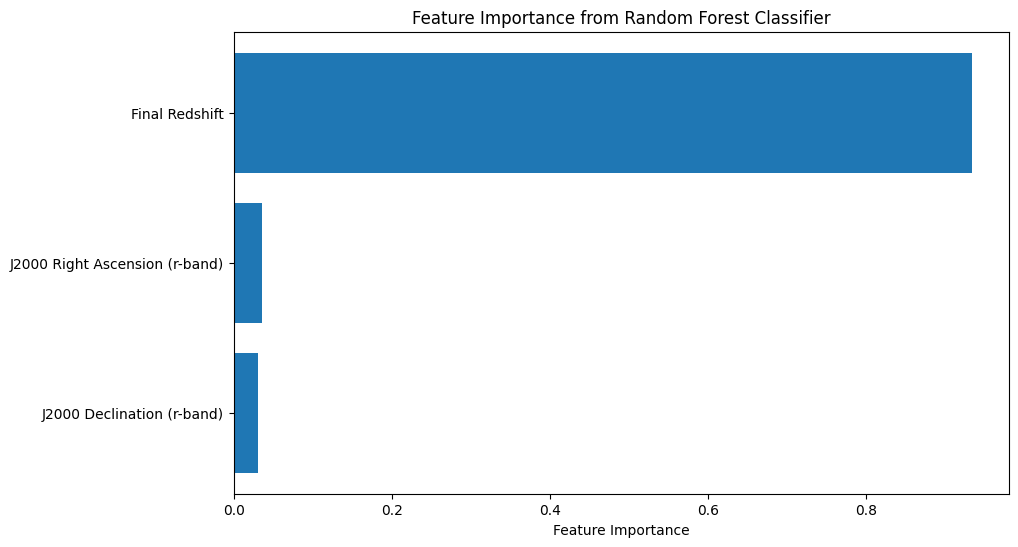

In [163]:
# Assume X_train and y_train are already defined (your training data)
# Convert X_train to a Pandas DataFrame
# Convert the column headers to a list
feature_headers = features_of_interest.columns.tolist()
X_train_df = pd.DataFrame(X_train, columns=feature_headers)
y_train_df = pd.DataFrame(y_train, columns=feature_headers)
# Instantiate the RandomForestClassifier
rfc = RandomForestClassifier(random_state=42)

# Fit the model to the training data
rfc.fit(X_train_df, y_train)

# Get feature importances
feature_importances = rfc.feature_importances_

# Sort the feature importances in ascending order and get the indices
sorted_idx = np.argsort(feature_importances)

'''# Get the feature names (assuming X_train is a pandas DataFrame with feature names)
feature_names = features_of_interest.columns.tolist()'''

# Plotting the feature importances
plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_idx)), feature_importances[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), [feature_headers[i] for i in sorted_idx])
plt.xlabel('Feature Importance')
plt.title('Feature Importance from Random Forest Classifier')
plt.show()


**Task: What are the top three features (1 point)?**

enter in the cell below

The top three features are redshift, ascension, and declination. 

<!-- answer -->

In this notebook, you have learned that redshift was the best predictor of what object you are observing. Now, did you actualy need to do this all to find this out? Probably not if you were an astrophysicist! But hey, we are not. So great job!

**Task: Briefly comment on what you have learned (1 point)**

see the cell below

I learned that using classic ML is pretty straightforward if your data is high quality. 

<!-- answer -->